# Demo Notebook Displaying Data Retrieved from SIS Web Service
This notebook is a simple and primative example of how to call the SIS web service to show the number of currently installed loggers by their model name.
### Steps
1. Download a version of the api_demo.py script. This script will make the call to the service: 

  `git clone git@github.com:ellenyu/sis-api.git`

2. Retrieve a token from the SIS UI and place in same directory as you api_demo.py script.
- Go to the SIS UI, click on your user name link in the upper right hand corner.
- On your account page, click the button "Get a Token for Web Services API".  
- Copy the contents of your token and paste it into a file in the api_demo.py directory.

In [1]:
# The api_demo.py script requires the python requests library. Additional requirements for this notebook are below.
# This notebook assumes python version >= 3.5

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# run api_demo.py with the 'getequipinstall' option
# You will need to specify the path of the api_demo.py script (will try to put more logic in the future)
# As written, this notebook assumes it is in the "examples" directory and the api_demo.py is in parent.
# The command below will write a file named "installedloggers.csv" into your current working directory
# As the script writes the file, it will print to stdout each page returned (each page is 10 records)
# Depending how many filters you use, many pages could be returned.  
# Examples of possible filters is in api_demo.py

%run ../api_demo.py prod getequipinstall installedloggers.csv --categorys "LOGGER"

{'category': 'LOGGER', 'isactive': 'y', 'page[number]': 1, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/api/v1/equipment-installations with filter: {'category': 'LOGGER', 'isactive': 'y', 'page[number]': 1, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/api/v1/equipment-installations with filter: {'category': 'LOGGER', 'isactive': 'y', 'page[number]': 2, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/api/v1/equipment-installations with filter: {'category': 'LOGGER', 'isactive': 'y', 'page[number]': 3, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/api/v1/equipment-installations with filter: {'category': 'LOGGER', 'isactive': 'y', 'page[number]': 4, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/api/v1/equipment-installations with filter: {'category': 'LOGGER', 'isactive': 'y', 'page[number]': 5, 'sort': 'category'}
Sending a request to https://anss-sis.scsn.org/sis/

In [3]:
# read in the file produced by the api_demo.py run into a dataframe called "df"
df = pd.read_csv('installedloggers.csv')

In [4]:
# example call just to show some contents of dataframe
print(df)

      modelname serialnumber netcode lookupcode
0        130-01   151430D945      C0       CHIL
1        130-01   153730D9AD      C0       LAMA
2        130-01   154730D9CD      C0       MCSU
3        130-01         9022      GS       PR05
4        130-01         903A      HV       JOKA
...         ...          ...     ...        ...
2715  TITAN SMA          944      UO       PETE
2716  TITAN SMA          945      UO       LOCK
2717  TITAN SMA          946      UO      BASIN
2718  TITAN SMA          947      UO       PF31
2719     WXT520     H1210004      N4       KMSC

[2720 rows x 4 columns]


In [5]:
# The purpose of these next calls group the dataframe by logger model name and produce counts for each model.
x=df['modelname']
grouped=x.groupby(df['modelname'])
d2 = grouped.count()

<AxesSubplot:xlabel='modelname'>

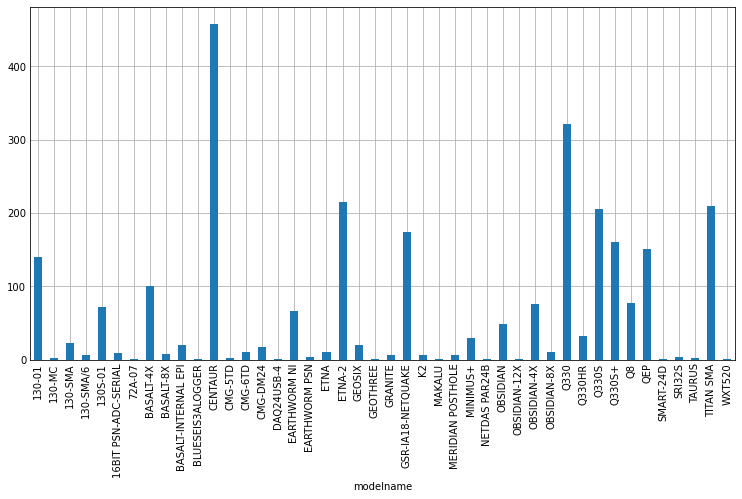

In [6]:
# plot the counts as a bar graph
d2.plot.bar()